# Question 1

# BER for BPSK, QPSK, 4QAM, 16PSK, 16QAM,32QAM

# Importing libraries

In [9]:
from scipy.special import erfc #erfc function in order to calculate BER as BER is Q(sqrt(SNR))
import matplotlib.pyplot as plt #for plots
import numpy as np #numerical python library
import math #math library

# Calculating BER of BPSK,QPSK,4QAM using Analysis.

In [10]:
normalisedSNR = np.arange(start=0,stop =24, step = 2)  
BER_for_BPSK = 0.5*erfc(np.sqrt(10**(normalisedSNR/10))) #to get everything in db
BER_for_QPSK = 0.5*erfc(np.sqrt(10**(normalisedSNR/10))) #to get everything in db
BER_4QAM = 0.5*erfc(np.sqrt(10**(normalisedSNR/10))) #to get everything in db
# BER16QAMANALYSIS = (3/8)*erfc(np.sqrt((2/5)*10**(normalisedSNR/10)))

# BER 16 QAM using Simulation

In [11]:

BER16QAMSIMULATION = np.zeros(len(normalisedSNR)) 
points16=16#Number of points in 16-QAM constellation
m=np.arange(0,points16)#all possible input symbols
a = 1*np.cos(m/points16*2*np.pi)
signaldata = np.random.randint(low=0, high = points16, size = 100000)
b = a[signaldata]
for i,j in enumerate(normalisedSNR):
    alpha = 10**(j/10)
    beta = sum(abs(b)**2)/len(b) 
    n = np.sqrt ((beta/alpha)/2)*np.random.standard_normal(b.size)
    s = b + n #add noise and input
    inputdetected = (s <= 0).astype(int) #thresold at value 0
    BER16QAMSIMULATION[i] = np.sum(inputdetected != signaldata)/100000 #calculate BER

# BER 32 QAM using Simulation

In [12]:
BER32QAMSIMULATION = np.zeros(len(normalisedSNR))
points32=32#Number of points in 32-QAM constellation
m = np.arange(0,points32) #all possible input symbols
a = 1*np.cos(m/points32*np.pi*2)
signaldata = np.random.randint(low=0, high = points32, size = 100000)
b = a[signaldata]
for i,j in enumerate(normalisedSNR):
    alpha2 = 10**(j/10)
    beta2 = sum(abs(b)**2)/len(b) 
    n = np.sqrt((beta2/alpha2)/2)*np.random.standard_normal(b.size)
    s = b + n  #add noise and input
    inputdetected = (s <= 0).astype(int) #thresold at value 0
    BER32QAMSIMULATION[i] = np.sum(inputdetected != signaldata)/100000 #calculate BER

# BER32QAMANALYSIS = ((2/5)*(1-(1/np.sqrt(32))))*erfc(np.sqrt((15/62)*10**(normalisedSNR/10)))




#  16PSK using simulation

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc
nSym = 10**5 
SNRinDB = np.arange(start=-4,stop = 24, step = 2)
BER16PSK = np.zeros(len(SNRinDB)) # simulated Bit error rates
M=16
m = np.arange(0,M)
A = 1;
constellation = A*np.cos(m/M*2*np.pi)
inputSyms = np.random.randint(low=0, high = M, size=nSym)
s = constellation[inputSyms] 
for j,EbN0dB in enumerate(SNRinDB):
    gamma = 10**(EbN0dB/10)
    P=sum(abs(s)**2)/len(s)
    N0=P/gamma 
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape)
    r = s + n 
    detectedSyms = (r <= 0).astype(int)
    BER16PSK[j] = np.sum(detectedSyms != inputSyms)/nSym 

# Plotting 

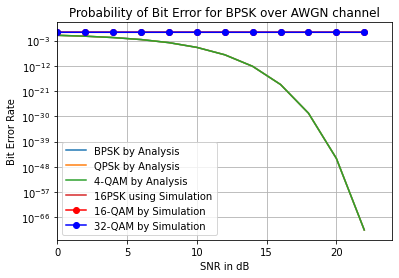

In [14]:

figure, axis = plt.subplots(nrows=1,ncols = 1)
axis.semilogy(normalisedSNR,BER_for_BPSK,marker='',linestyle='-',label='BPSK by Analysis')
axis.semilogy(normalisedSNR,BER_for_QPSK,marker='',linestyle='-',label='QPSk by Analysis')
axis.semilogy(normalisedSNR,BER_4QAM,marker='',linestyle='-',label='4-QAM by Analysis')
axis.semilogy(SNRinDB,BER16PSK,marker='',linestyle='-',label='16PSK using Simulation')
axis.semilogy(normalisedSNR,BER16QAMSIMULATION,color='r',marker='o',linestyle='-',label='16-QAM by Simulation')
axis.semilogy(normalisedSNR,BER32QAMSIMULATION,color='b',marker='o',linestyle='-',label='32-QAM by Simulation')
axis.set_xlabel('SNR in dB')
axis.set_ylabel('Bit Error Rate')
axis.set_xlim(0,24)
axis.grid(True)
axis.set_title('Probability of Bit Error for BPSK over AWGN channel')
axis.legend()
plt.savefig("Question1plot.pdf")
plt.show() 
